
**Team Name: Team 24**

**Team Member 1:**

- Name: Gobinath Velusamy (Part 1: Q1.1 to Q1.4 and Part 2: Q2.1)
- Student ID: s223917881

**Team Member 2:**

- Name: Nitin Kumar (Part 1: Q1.5 to Q1.7 and Part 2: Q2.2)
- Student ID: s223915904

**Team Member 3:**

- Name: Rohan Sharma (Part 1: Q1.8 to Q1.10 and Part 2: Q2.3)
- Student ID: s223939816

<p>
<span style="font-family: Arial; font-size:1.4em;color:blue;">
<span style="font-family: Arial; font-size:1.4em;color:blue;">
<center> <span style="font-family: Arial; font-size:2em;color:dodgerblue;">Modern Data Science SIG742: Part 1</p> </center>
</p>

<hr style="border: 2px solid gray; width: 99.5%;">

<span style="font-family: Arial; font-size:2em;color:gold;"> Import the Libraries
<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">

In [6]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

<span style="font-family: Arial; font-size:2em;color:gold;"> Read the Dataset
<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">

In [193]:
# reading the data from the github and storing into dataframe named as df
dfurl="https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip"
df = pd.read_csv(dfurl,compression='zip')

In [194]:
#checking the shape of the dataset
df.shape

(355808, 8)

In [195]:
# checking first 5 rows of the dataset using head function
df.head()

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description  
0  max cleo black dress paper crane black tank to...  
1       sequin pink sign sequins missing gently worn  
2  box great condition comes soft pop protector p...  
3                 baby black nike roshe runs size 5c  
4  2 polo dresses 3 months wore washed dreft pink...

In [196]:
# checking the datatypes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [197]:
# checking the duplicate values in the dataset
dup_count=df.duplicated().sum()
print("Duplicate Rows :",dup_count)
#Drop the Duplicate Records, as these are not adding any value and even these will affect the further analysis
df.drop_duplicates(keep=False, inplace=True)

Duplicate Rows : 48572


In [198]:
# Rechecking if there are any duplicate post removal
dup_count=df.duplicated().sum()
print("Duplicate Rows :",dup_count)

Duplicate Rows : 0


In [199]:
# our assumption price column is a buy or sell products so 0 records not making any sense to removing these for our further analysis
df=df.loc[df['price'] != 0]

In [200]:
# Rechecking whether there are any records with price = 0
df.loc[df['price'] == 0]

Empty DataFrame
Columns: [train_id, name, item_condition_id, category_name, brand_name, price, shipping, clean_description]
Index: []

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.1 - Gobinath
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs1'></a>

Find the missing values:

• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.1

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> we will Create python function missing_values_table() to find the missing values columns 
        <li> we will further check the missing values for both categorical & numerical columns </li> 
<li> We will replace missing values of numerical columns to mean values (Standard statistics process)
<li> for categorical columns we cann't impute the mean values however in the subsequent question it was suggested to use th category unknown for the column "brand_name", therefore we will do this imputation </li>
       
 </ol>
   
</div>

In [201]:
def missing_values_table(df):
    # Calculate the total missing values for each column
    missing_cnt = df.isnull().sum()
    # Filter columns with missing values (count > 0)
    missing_cnt = missing_cnt[missing_cnt > 0]

    # Calculate the percentage of missing values
    missing_per = (missing_cnt / len(df)) * 100

    # Create a summary table
    missing_table = pd.DataFrame({
        'Missing Values': missing_cnt,
        'Percentage of Missing Values': missing_per
    })

    # Sort the table by the percentage of missing values in descending order
    missing_table = missing_table.sort_values(by='Percentage of Missing Values', ascending=False)

    # Impute missing values with the mean for columns with missing values (if numeric)
    for column in missing_table.index:
        if pd.api.types.is_numeric_dtype(df[column]):

            df[column].fillna(df[column].mean(), inplace=True)

    return missing_table

In [202]:
# calling the function (missing-values_table) while passing the dataframe
missing_values_table(df)

Missing Values  Percentage of Missing Values
brand_name                 112535                     42.767508
category_name                1124                      0.427162
clean_description             140                      0.053205

In [203]:
#Default Brand Name column as unavialable to better EDA
df['brand_name'] = df['brand_name'].fillna('brand unavailable')

In [204]:
# Rechecking post imputation
missing_values_table(df)

Missing Values  Percentage of Missing Values
category_name                1124                      0.427162
clean_description             140                      0.053205

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1 .Only Categorical(brand_name, category_name and clean_description) values having missing Values

2.Numerical columns (item_condition_id,train_id ,price,shipping) doesn't have missing values

3.So none of the numerical values replace of missing values to Mean happened here

4.42.7% of the Brand having null values so we are imputing these values in the subsequent cell

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> using df.isnull is the easiest way to identify the missing values therefore we have used it, a function is created to avoid the repeat checkes for each column  </li> 
    </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> the given solutions looks to be optimal because it handles all the columns (categorical and numerical) in single fucntion </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.2 - Gobinath
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs2'></a>

Find the price information from the data:

• Write code to print the median price of the items in the data;

• What is the 90th percentile value on the price;

• Draw the histogram chart for the price of the items in the data with 50 bins.


<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.2

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> we will use pandas inbuild function "median" to calculate the meadian value  </li> 
    <li> for getting the 90th percentile we will use "quantile" function  </li> 
    <li> to draw the histogram chart we will use  plt.hist function from pyplot </li> 
    
 </ol>
   
</div>

In [205]:
#Write code to print the median price of the items in the data
def calc_median(df,col_name):
  try:
    # Calculate the median for each passed column
    median_value = df[col_name].median()
    return median_value
  except KeyError:
        print(f"Column '{col_name}' not found in the DataFrame.")
        return None
print("Median value of price column",calc_median(df,'price'))

Median value of price column 17.0


In [206]:
#What is the 90th percentile value on the price;
# Calculate the 90th percentile (0.9 quantile) for the 'price' column
per_90 = df['price'].quantile(0.9)
# Print the 90th percentile value
print("90th percentile value for 'price':", per_90)

90th percentile value for 'price': 51.0


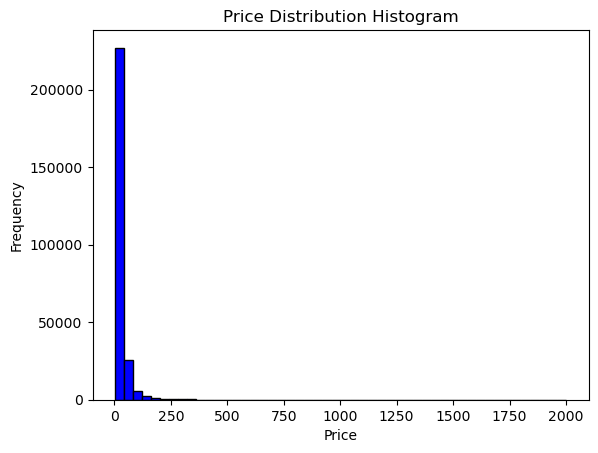

In [207]:
#Draw the 4
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
# Add labels and title for the Graph
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
# Show the histogram
plt.show()

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1. Median value of price column 17.0
    
2. 90th percentile value for 'price' 51.0
    
3. most of the prices are between 0 to 100

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.3 - Gobinath
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs3'></a>

Exploring the shipping information from the data:

• Write code to find out the percentage of the items that are paid by the buyers.

• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).

• When buying the items online, do you need to pay higher price if seller pays for the
shipping? Write the code to find out (Compare the median price of items paid by buyers
and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.3

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> Assuming 1 indicates paid by the buyer, 0 indicates not paid in shipping column </li> 
    <li> to calcuate the percentage of items paid by buyers will be done by summing up (all 1 values will add-up) the shipping columsn and then divide it with lenth of the shiping column using   </li> 
    <li> for ploting histogram we will use plt.hist from pyplot using filter as 1 for seller and 0 for buyer </li> 
    <li>to compare the median price of items paid by buyers and items paid by sellers we will use "median" function to compare </li> 

 </ol>
   
</div>

In [208]:
#Write code to find out the percentage of the items that are paid by the buyers
# Assumption : 1 indicates paid by the buyer, 0 indicates not paid
# Calculate the percentage of items paid by buyers
per_paid_by_buyers = (df['shipping'].sum() / len(df['shipping'])) * 100
# Print the percentage
print("Percentage of items paid by buyers: {:.2f}%".format(per_paid_by_buyers))

Percentage of items paid by buyers: 44.69%


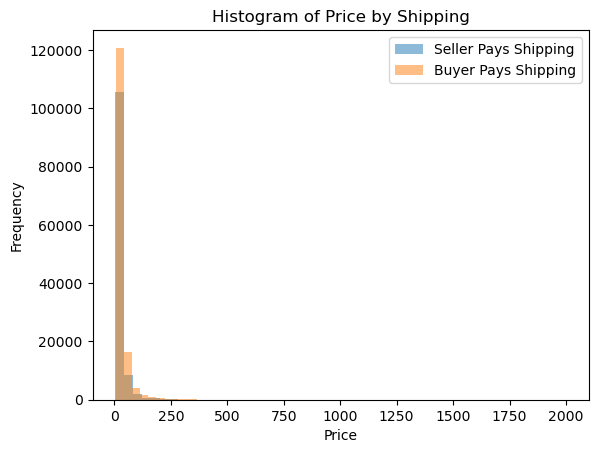

In [209]:
#Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins)
# Split data based on shipping (seller pays vs. buyer pays)
# Assumption shipping =1 means seller , Shipping =0 buyer
seller_pays_shipping = df[df['shipping'] == 1]['price']
buyer_pays_shipping = df[df['shipping'] == 0]['price']

# Plot the histograms on the same plot
plt.hist(seller_pays_shipping, bins=50, alpha=0.5, label='Seller Pays Shipping')
plt.hist(buyer_pays_shipping, bins=50, alpha=0.5, label='Buyer Pays Shipping')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price by Shipping')
plt.legend()
plt.show()

In [210]:
#When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).
# Assumption shipping =1 means seller , Shipping =0 buyer
# Calculate the median prices for both cases
median_price_seller_pays_shipping = df[df['shipping'] == 1]['price'].median()
median_price_buyer_pays_shipping = df[df['shipping'] == 0]['price'].median()

# Reporting of the elements
print("Median price when seller pays for shipping: $", median_price_seller_pays_shipping)
print("Median price when buyer pays for shipping: $", median_price_buyer_pays_shipping)

# Determine if there's a significant difference
if median_price_seller_pays_shipping < median_price_buyer_pays_shipping:
    print("Buyers paying for shipping tend to pay a higher median price.")
elif median_price_seller_pays_shipping > median_price_buyer_pays_shipping:
    print("Sellers paying for shipping tend to result in a higher median price.")
else:
    print("The median prices are the same regardless of who pays for shipping.")


Median price when seller pays for shipping: $ 14.0
Median price when buyer pays for shipping: $ 19.0
Buyers paying for shipping tend to pay a higher median price.


<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1. Percentage of items paid by buyers is 44.69% hence seller is paying more amount 
    
2. both buyer and seller have frequnecy of price between 0 to 100, buyer has more frequecy then seller which indicates buyer has more demand
    
3. Buyer median price is $ 19.0 which is higer than seller median price (14.0)

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.4 - Gobinath
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs4'></a>

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.

• Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.

• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price (draw the plot
and answer this question in the comment and report).


<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.4

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> to find out the item condition information we will use the value counts function   </li> 
    <li>  to draw the boxplot on the prices of each item conditions we will use boxplot from seaborn </li> 
 
 </ol>
   
</div>

In [211]:
#Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id.
# Print the count of rows for each value in 'item_condition_id'
print("Count of rows for each item_condition_id value:")
print(df['item_condition_id'].value_counts())

Count of rows for each item_condition_id value:
1    113547
3     76877
2     66542
4      5763
5       403
Name: item_condition_id, dtype: int64


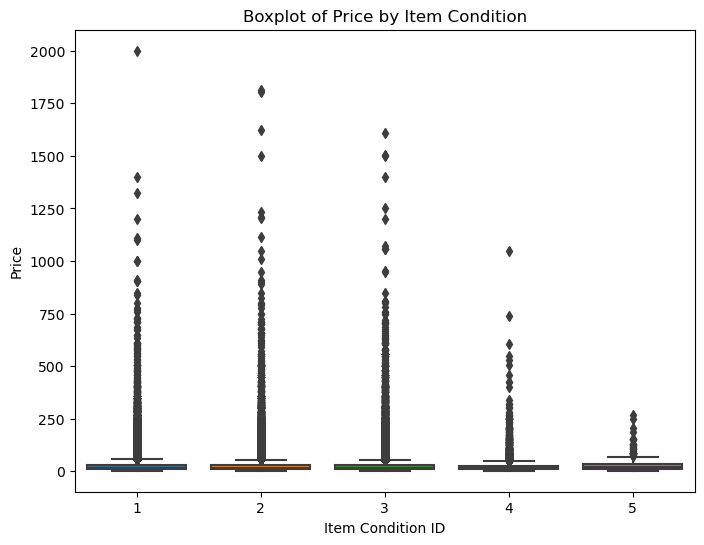

In [212]:
#Draw the boxplot graphs (one plot) on the price for each item condition value, and find out out whether
# the better condition of the item could have higher median price (draw the plot and answer this question in the comment and report)
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='item_condition_id', y='price', data=df)
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.title('Boxplot of Price by Item Condition')
plt.show()



<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1. Lower item id have more frequency such as id 1 has 113547 and 2 66542
    
2. Based on the boxplot, it appears that items in better condition (lower item_condition_id) tend to have a higher median price.
    


<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.5 - Nitin
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs5'></a>

Conduct the category analysis and find out the relevant information:

• Write the code to find out (print) how many unique categories you could find from column
category_name.

• For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories (now you probably understand the findings you had
in Question 1.4).


<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.5

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 1.5.1</p>
Write the code to find out (print) how many unique categories you could find from column category_name.

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> To identify the how many unique categories are there in category_name columns we will use the nunique fucntion </li> 
    <li> we will use the nunique function in the print statement itself which will results the no of unique count </li> 
    
 </ol>
   
</div>

In [213]:
#1st approach 
# printing the unique categories from the column category name
# Using the 'nunique()' function to get the number of unique categories 
print("Total Unique Categories are: {}".format(df['category_name'].nunique()))

Total Unique Categories are: 1116


In [214]:
#2nd approach 
# Using the 'nunique()' function to get the number of unique categories 
print("Total Unique Categories are: {}".format(len(df['category_name'].value_counts())))

Total Unique Categories are: 1116


In [215]:
# List of unique categories with number of items in each category, from column category_name
print(df['category_name'].value_counts())

Women/Athletic Apparel/Pants, Tights, Leggings                      10553
Women/Tops & Blouses/T-Shirts                                        8266
Beauty/Makeup/Face                                                   6148
Beauty/Makeup/Lips                                                   5315
Electronics/Video Games & Consoles/Games                             4769
                                                                    ...  
Vintage & Collectibles/Trading Cards/Price Guides & Publications        1
Vintage & Collectibles/Serving/Glassware                                1
Handmade/Clothing/Dress                                                 1
Handmade/Pets/Toy                                                       1
Handmade/Books and Zines/Comic                                          1
Name: category_name, Length: 1116, dtype: int64


<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
To identify the no of unique categoires we have used nunique() function to get the number of unique categories in the dataset. 
we have used this function in the print statment itself to print the unique count of categories. with that we found that there are <b>1116</b> unique categories are there.
    
Additionally we have used the value count function on the category_name column to see all the unique categories along with their count. "Women/Athletic Apparel/Pants, Tights, Leggings " is the top category with highest count of 10553


<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> "nunique" is the easiest way to identify the number of unique category therefore we have use this options </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> yes there are other solutions as well like using len function over value count would give the similar results len(df['category_name'].value_counts()) </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> yes, we can use len(df['category_name'].value_counts()) to find the number of unique categories. However, it calculates both the unique categories and their counts, so if we only need the number of unique categories without their counts, using nunique() would be more efficient approach </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 1.5.2</p>
For the items with worst condition only (highest value from item_condition_id), write code to (print) find out the top 3 categories

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> Per given understanding  the highest value of the 'item_condition_id' column would mean the worst condition </li> 
    <li> Therefore, to identify the value for the 'item_condition_id' field which is having the worst condition we will use the group by function </li> 
<li> Post that we will use a condition in which is results the row haivng item_condition_id == 5 and subsequent categoires will be shown using group by</li> 
<li> And then we will use nlargest function to show top 3 categories </li> 
    
 </ol>
   
</div>

In [216]:
# printing the item condition id using value counts function to see the worst condition index
df['item_condition_id'].value_counts().sort_index()

1    113547
2     66542
3     76877
4      5763
5       403
Name: item_condition_id, dtype: int64

In [217]:
#1st approach 
# Group the DataFrame by 'category_name' and calculate the count of each category where 'item_condition_id' is equal to 5
category_counts = df[df['item_condition_id'] == 5].groupby('category_name').size()
# Find the top 3 categories with the lowest item_condition_id
top_3_categories = category_counts.nlargest(3)
# Print the result
print("Top 3 Categories with lowest item condition id are:")
print(top_3_categories)

Top 3 Categories with lowest item condition id are:
category_name
Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    94
Electronics/Video Games & Consoles/Games                           33
Electronics/Video Games & Consoles/Consoles                        28
dtype: int64


In [218]:
#2nd approach 
# printing the top 3 categoires with lowest item conditions 
print("Top 3 Categories with lowest item condition id are:")
# filtering the rows using condition then putting up the category using value count and then using head to show first 3 rows
df[df['item_condition_id']==5]['category_name'].value_counts().head(3)

Top 3 Categories with lowest item condition id are:


Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    94
Electronics/Video Games & Consoles/Games                           33
Electronics/Video Games & Consoles/Consoles                        28
Name: category_name, dtype: int64

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
To identify the top 3 categories with item condition id = 5 we have used the value count function to understand the item conditions first and then we have used a fiter using condition which is eventually filtering the row which is having item condition = 5 and shows the sebsequent categories using groupby function we have used nlargest to see top 3 categories. the categories are:
    
i) Electronics/Cell Phones & Accessories/Cell Phones & Smartphones
    
ii)  Electronics/Video Games & Consoles/Games
    
iii) Electronics/Video Games & Consoles/Consoles 
    


<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> this is a simplestic solution where we are identifying the the worst item condition id and then </li> 
    <li> using this id to filter out the rows of the dataframe and used a group by function to group the categories and then used the nlargest function to show only 3 higest values  </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> there could be other way also like using value count function over the filtered rows and then use the head fuction to shown only first 3 rows </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> for the small dataset we can use the 2nd approach as well however it involves multiple passes through the data and creates intermediate series,which eventually making the system more computationally heavy </li> 
    <li> for the largest dataset we should use the first approch using groupby   </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.6 - Nitin
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs6'></a>

The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and
subcat_2) are concatenated with ’/’ character sequentially in the data now.

• Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character. you need to handle the exception in the function
for those has missing values (NaN). For missing values (NaN), the results from splitting
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.

• Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.6

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> to solve the given problem we will be creating a function "Split_fun" which eventually takes two inputs as dataframe and, column name  </li> 
    <li> to store the splitted value we will create 3 empty list   </li> 
    <li> we will values the null values as well using isnull function and fill the values by "Category Unknown/Category Unknown/Category Unknown" </li> 
    <li> running a for loop to iterate over the rows of the dataframe and spliting the values using split function</li> 
    <li>storging the splited values into 3 different variables and appending the values in blank lists  </li> 
    <li> and at last retuning the the 3 lists </li>
     <li> calling the function by giving dataframe and name of the columns (df,category_name) and stroging the results into 3 different newly created columns  </li>
 </ol>
   
</div>

In [219]:
#1st appraoch
# function to split the category values into 3 different columns 
def split_fun(d_frame,cat):
    # 3 empty lists to store the spliltted values
    main_cat_list = []
    subcat_1_list = []
    subcat_2_list = []
    
    # Validation to handle if there are any null values imputing category unknown to all 3 columns
    if (d_frame[cat].isnull().sum()) > 0:
        d_frame[cat]=d_frame[cat].fillna("Category Unknown/Category Unknown/Category Unknown")

    # iterating the rows fo the dataframe and splitting them and storing them into 3 variables
    for index,row in d_frame.iterrows():
        cat1 = row[cat].split("/")[0]
        cat2 = row[cat].split("/")[1]
        cat3 = row[cat].split("/")[2]
        #appending the splited value into emplty list
        main_cat_list.append(cat1)
        subcat_1_list.append(cat2)
        subcat_2_list.append(cat3)
    # returning the final list post completion of all iterations
    return main_cat_list, subcat_1_list, subcat_2_list

In [220]:
#calling the function and putting them into 3 new columns of the dataframe
df['main_cat'],df['subcat_1'],df['subcat_2'] = split_fun(df,'category_name')
df.head()

train_id                                   name  item_condition_id  \
0    128037               Bundle for Sassy Sisters                  3   
5    371403  Hello Kitty red bow medicine case box                  1   
6     73349              Lodge Cast iron grill pan                  1   
7   1166159     Lot of 3 sterling silver bracelets                  3   
8   1070016                    Yeezy style booties                  1   

                                       category_name         brand_name  \
0                        Women/Tops & Blouses/Blouse  brand unavailable   
5  Home/Storage & Organization/Jewelry Boxes & Or...        Hello Kitty   
6                     Home/Kitchen & Dining/Cookware              Lodge   
7                            Women/Jewelry/Bracelets  brand unavailable   
8                                  Women/Shoes/Boots  brand unavailable   

   price  shipping                                  clean_description  \
0   16.0         0  max cleo black dress paper crane black tank to...   
5    8.0         1  brand new package authentic sanrio japan plast...   
6   26.0         0                               10 1 2 cast iron pan   
7   14.0         1  lot 3 solid sterling silver bracelets 7in long...   
8   40.0         1  brand new beige colored boots popular style cu...   

  main_cat                subcat_1                    subcat_2  
0    Women          Tops & Blouses                      Blouse  
5     Home  Storage & Organization  Jewelry Boxes & Organizers  
6     Home        Kitchen & Dining                    Cookware  
7    Women                 Jewelry                   Bracelets  
8    Women                   Shoes                       Boots

In [221]:
# 2nd approach 
def split_fun(d_frame, cat):
    # Create new DataFrame with split values
    split_df = d_frame[cat].str.split('/', expand=True, n=2)
    # Rename the columns
    split_df.columns = ['main_category', 'sub_category_1', 'sub_category_2']
    # Fill missing values with "Category Unknown"
    split_df = split_df.fillna("Category Unknown")
    return split_df

In [222]:
df1=df.copy()
split_fun(df1,'category_name')

main_category            sub_category_1              sub_category_2
0              Women            Tops & Blouses                      Blouse
5               Home    Storage & Organization  Jewelry Boxes & Organizers
6               Home          Kitchen & Dining                    Cookware
7              Women                   Jewelry                   Bracelets
8              Women                     Shoes                       Boots
...              ...                       ...                         ...
355803   Electronics  TV, Audio & Surveillance                  Headphones
355804          Kids                      Toys        Learning & Education
355805         Women                 Underwear                        Bras
355806           Men                     Shoes            Fashion Sneakers
355807         Women                   Jewelry                    Earrings

[263132 rows x 3 columns]

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
to split the string under category_name column we have used loops to split it and to ensure there are no null values we have used the fill na function and filled it with "Category Unknown". one observation could be if there are more than 3 value in this columsn those will not be addressed by this solution as this has been explicitly aske therefore we have limit this solution to 3 splits only.

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> We have used the usual way of iterating the rows using loop and then split the values, therefore we have used this solution which give us resutls as expected </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> we have shown the other way to solve this problem in 2nd approach which evntually creating a dataframe with splited values and then putting them in 3 columns using expend true (expending it to 3 columns and n =2 means maximum split is 3 only  </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> looping is more computation heavy in comparsion to verctorized operations, therfore for the small dataset we can use loops and for larger dataset we can use 2nd approach</li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.7 - Nitin
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs7'></a>

After splitting the category for column category_name, we now have the three main details
regarding to the category information. However, we need to clean the text in each of the new
three columns in lowercase.

• Write code (or function) to change the text (value in each row) from the new three columns
to lowercase.

• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data (only showing the top 5).

• Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.7

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> for change the text into lowercase we can use str.lower() function </li> 
    <li> to plot the top 5 most popular main categories in main_cat column we will use value_count function and then choose first 5 rows using head function and then plot them usign plot function </li> 
    <li> Subsequently we will print the no of unique main categories, sub category 1 and sub category2 using nunique fucntion  </li> 

 </ol>
   
</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 1.7.1</p>
Write code (or function) to change the text (value in each row) from the new three columns to lowercase.

In [223]:
# 1st approach
#  using str.lower ucntion to convert the text into lowercase
df['main_cat'] = df['main_cat'].str.lower()
df['subcat_1'] = df['subcat_1'].str.lower()
df['subcat_2'] = df['subcat_2'].str.lower()
# using head(2) to show the converted values
df.head(2)   

train_id                                   name  item_condition_id  \
0    128037               Bundle for Sassy Sisters                  3   
5    371403  Hello Kitty red bow medicine case box                  1   

                                       category_name         brand_name  \
0                        Women/Tops & Blouses/Blouse  brand unavailable   
5  Home/Storage & Organization/Jewelry Boxes & Or...        Hello Kitty   

   price  shipping                                  clean_description  \
0   16.0         0  max cleo black dress paper crane black tank to...   
5    8.0         1  brand new package authentic sanrio japan plast...   

  main_cat                subcat_1                    subcat_2  
0    women          tops & blouses                      blouse  
5     home  storage & organization  jewelry boxes & organizers

In [224]:
# 2nd approach
#df[['main_cat','subcat_1','subcat_2']] = df[['main_cat','subcat_1','subcat_2']].applymap(str.lower)" 

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
value have been convereted into lower case by using str.lower function

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> Str.lower is the easiest way to convert the text into lower case </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> we can use applymap to convert the column in lower case as defied in approach 2" </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> Given soutions is looks to be optimal and it fulfill the expetations, however 2nd approach is better in terms of the lenght of the code</li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 1.7.2</p>
Draw the bar chart to find out the top 5 most popular main categories (in column main_cat) in the data (only showing the top 5).

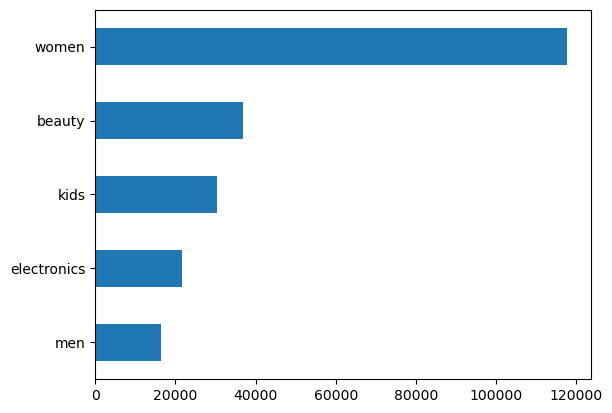

In [225]:
# printing the top 5 main categories using value_count, head function and plot function, barh is used for horizontal positioning
df['main_cat'].value_counts().head(5).sort_values().plot(kind='barh');

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
we have used value count, head and plot function to print the top main categories, women, beauty, kides and electonics and men are the top main categories 

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> using value count is easiest to convert it into plot in a single line code </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> we can use nlargest values as well instead of using sort_values and head and then print the plot by mentioning the x axis and y axis </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> Given soutions is looks to be optimal and it fulfill the expetations, however we can further imporve this by adding axis's to the plot </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 1.7.3</p>
Write code (or function) to (print) find out how many unique main categories (in col umn main_cat), unique first sub-categories (in column subcat_1) and unique second sub-categories (in column subcat_2) respectively.

In [226]:
# columns list is created to use only 3 columns in for loop
col=['main_cat','subcat_1','subcat_2']
# fucntion "print_unique" is created to print the unique values from all 3 columns it take dataframe and column as input
def print_unique(dataframe,col):
    # a for loop is created to iterate over the columns listed in col variable
    for i in dataframe[col]:
        # if condiiton is used to check whether it is main category or otherone
        
        if i == 'main_cat':
            # a "#" split line is created 
            print("#"*100)
            # printing the unique count of main category
            print("'\033[1m'Main Category Unique Values count is:'\033[0;0m'",dataframe[i].nunique())
            # printing the unique values of main category
            print("'\033[1m'Main Category Unique Values are:'\033[0;0m'",dataframe[i].unique())
        
        # elif is used to check for the subcat1 condition
        elif i == 'subcat_1':
            # a "#" split line is created 
            print("#"*100)
            # printing the unique count of category1
            print("'\033[1m'Sub Category1 Unique Values count is:'\033[0;0m'",dataframe[i].nunique())
            # printing the unique values of category1
            print("'\033[1m'Sub Category1 Unique Values are:'\033[0;0m'",dataframe[i].unique())
        # else is used to for the remaining values in the given list    
        else:
            ## a "#" split line is created 
            print("#"*100)
            # printing the unique count of category2
            print("'\033[1m'Sub Category2 Unique Values count is:'\033[0;0m'",dataframe[i].nunique())
            # printing the unique values of category2
            print("'\033[1m'Sub Category2 Unique Values are:'\033[0;0m'",dataframe[i].unique())

#calling the print_unique fucntion            
print_unique(df,col)        

####################################################################################################
''Main Category Unique Values count is:'' 11
''Main Category Unique Values are:'' ['women' 'home' 'kids' 'electronics' 'men' 'beauty'
 'vintage & collectibles' 'handmade' 'other' 'category unknown'
 'sports & outdoors']
####################################################################################################
''Sub Category1 Unique Values count is:'' 114
''Sub Category1 Unique Values are:'' ['tops & blouses' 'storage & organization' 'kitchen & dining' 'jewelry'
 'shoes' 'boys (4+)' 'video games & consoles' "men's accessories"
 'sweaters' 'home décor' 'makeup' 'pants' 'toy' 'dresses' 'skirts'
 "women's accessories" 'athletic apparel' 'boys 0-24 mos' 'girls 0-24 mos'
 'toys' 'underwear' 'jeans' "women's handbags" 'skin care' 'paper goods'
 'coats & jackets' 'antique' 'pet supplies' 'cell phones & accessories'
 'girls (4+)' 'serving' 'girls 2t-5t' 'office supplies' 'media'
 'cate

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
i) We found there are 11 unqiue values in main category 

ii) in sub category_1 we found 114 unique values

iii) in sub category_2 we found 781 unique values

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li> using a list of column we can simple use if and else condition to print the unique value using nunique function  </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> yes we can use for loop to iterate over the list of column </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> Given soutions is looks to be optimal and it fulfill the expetations, however by adding a for loop we can further reduce the line of codes </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.8 - Rohan
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs8'></a>

Exploring the price and categories.

• Write code to (print) find out the median price for all the categories in new column main_cat.

• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.

• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.8

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> we will use aggreate function like groupby together with median, Max and Min </li> 
    <li> for ploting we will use plot function </li> 
 </ol>
   
</div>

In [227]:
# Using the groupby function to calculate the median price for all the main_cat items
data=df.groupby(["main_cat"],as_index=False)["price"].median()
data.rename(columns = {'price':'Median Price'}, inplace = True)
data

main_cat  Median Price
0                   beauty          15.0
1         category unknown          18.0
2              electronics          15.0
3                 handmade          11.0
4                     home          18.0
5                     kids          14.0
6                      men          21.0
7                    other          14.0
8        sports & outdoors          16.0
9   vintage & collectibles          16.0
10                   women          19.0

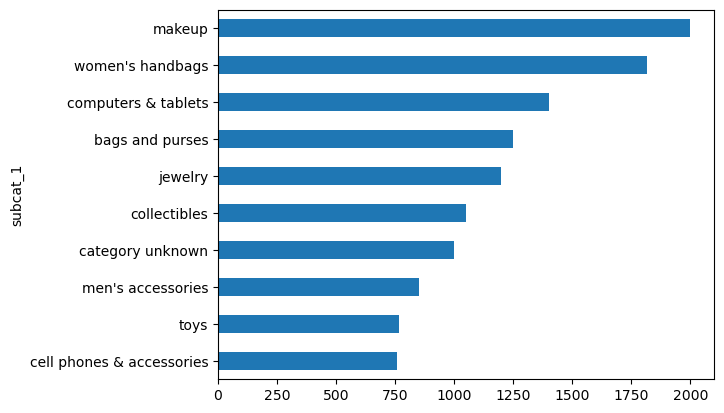

In [228]:
# Bar chart to find the top 10 most expensive sub categories in column subcat_1
df.groupby(["subcat_1"])["price"].max().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');

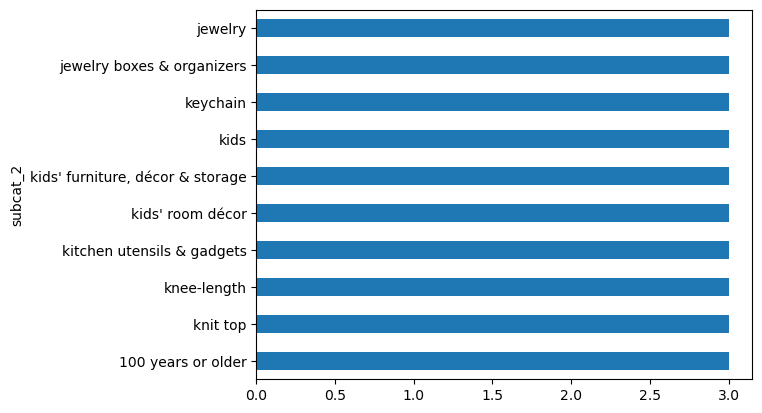

In [229]:
# Bar chart to find out the top 10 cheapest second sub-categories (in column subcat_2) in the data.
df.groupby(["subcat_2"])["price"].min().sort_values().head(10).plot(kind='barh');

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1) Men, women and category_unknown are the higest median prices under main category

2) makeup, women's handbag and computers and tablets are the top 3 subcat_1
    
3) Jewelry, jewelry boxes, organizers and keychains are the lowest categories under subcat_2

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li>  Group by function was the easiest to use in this scenario  </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> An alternative could have been to use the pivot table to find the median price for each of the main category </li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> Groupby is flexible and efficient for simple aggregation and here the need was a simple aggregation for the main category. Pivot table provides more flexibility for complex aggregations and data visualization. Since the aggregation was simple for this use case, we went with the group by function. </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.9 - Rohan
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs9'></a>

Exploring the price and brand.

• Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).

• Draw the bar chart to find out the top 10 most popular brands in the data.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.9

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> We have to write the code to find out the median price for all the brands and if there were any NaN data for brand we had to replace it with 'brand unavailable' and also to find the bar chart to find out the top 10 most popular brands in the data. We had changed the NaN with brand unavailable in the initial part of our EDA where we are used the fillna function.</li> 
<li>Since this was a simple aggregation on 'brand name' column, for this part also we went with the same approach of using groupby and use the median function on the price column </li>
        
<li> For finding the most popular brand names we will use the value count function on the data frame for 'brand name' column
    if the top one was 'brand unavailable', we will skip this record and went with the next 10 popular brands and created the bar chart for those items.        
<li> For ploting we will use plot function </li> 
 </ol>
   
</div>

In [231]:
# Write code to (print) find out the median price for all the brands (fill NaN with ’brand unavailable’).
data=df.groupby(["brand_name"],as_index=False)["price"].median()

In [232]:
# printing all the median price
data.rename(columns = {'price':'MedianPrice'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data)

                                   brand_name  MedianPrice
0                                      % Pure         14.5
1                                     10.Deep         18.0
2                                       21men         10.0
3                             3.1 Phillip Lim        232.5
4                                         3M®         15.0
5                                    47 Brand         12.0
6                               5.11 Tactical         93.0
7                                 5th & Ocean         20.0
8                          7 For All Mankind®         25.0
9                         90 Degree By Reflex         12.5
10                              A Bathing Ape         45.0
11                           A Pea In The Pod         18.0
12                        A Plus Child Supply          8.0
13                           A Wish Come True        137.0
14                                A&A Optical         24.0
15                                 A&R Sports         26

In [233]:
data.loc[data['brand_name'] == 'brand unavailable']

brand_name  MedianPrice
2845  brand unavailable         14.0

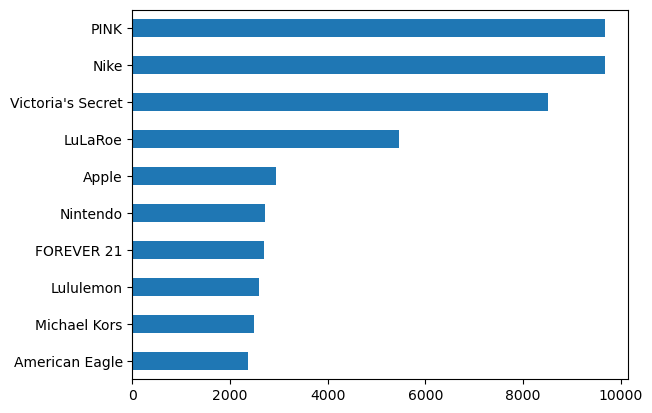

In [235]:
#Bar chart to find out the top 10 most popular brands in the data. Skipping 'Brand unavailable'
# This is been done by finding the counts each brand has been repeated.
df['brand_name'].value_counts()[1:11].sort_values().plot(kind='barh');

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1) Pink, Nike and Victoria's Secret are the most popular brands

2) We found that they were around 2,884 different brand names and the median price for each of the brand name was printed. We also checked for 'brand unavailable' row and the median price for it came to be 14

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> i) why we decided to choose this solution </b>
    <li>  Group by function was the easiest to use in this scenario  </li> 
    </ul>
    <ul>
    <b> ii) Are there any other solutions that could solve the question </b>
    <li> An alternative could have been to use the pivot table to find the median price for each of the brand name</li> 
     </ul>
    <ul>
    <b> iii) Whether the given solution is the optimal or not? why? </b>
    <li> Groupby is flexible and efficient for simple aggregation and here the need was a simple aggregation for the main category. Pivot table provides more flexibility for complex aggregations and data visualization. Since the aggregation was simple for this use case, we went with the group by function. </li> 
     </ul>    
   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 1.10 - Rohan
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs10'></a>

Item Description Analysis.

• Could you draw the wordcloud chart by using the column clean_description.

• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).

• Draw the wordcould by using the column clean_description on each quantile of price data.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 1.10

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> To implement this we will use the word cloud and utilize the value of clean_description to generate the word cloud</li> 
    <li>  As suggested for the next part, we will use the qcut function of pandas to create a new column 'price_qcut' and give the labels as first, second, third, fourth. This divided the data into four quartiles. For each of the quartiles, we will extract the clean description and passed to the word cloud function. This generated the word cloud for each of the quartile.   </li> 

 </ol>
   
</div>

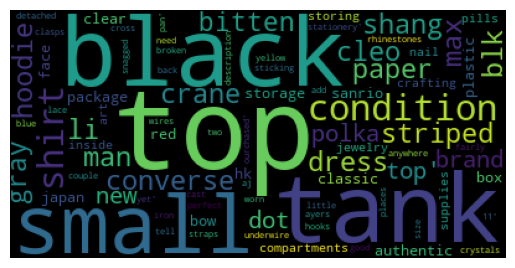

In [236]:
# Wordcloud chart by using the column clean_description
text = df['clean_description'].values
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [238]:
# Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec ond/third/fourth quantile).

df['price_qcut'] = pd.qcut(df.price, q=4,
                        labels=['first',
                                'second',
                                'third',
                                'fourth'
                                ])
df.head()

train_id                                   name  item_condition_id  \
0    128037               Bundle for Sassy Sisters                  3   
5    371403  Hello Kitty red bow medicine case box                  1   
6     73349              Lodge Cast iron grill pan                  1   
7   1166159     Lot of 3 sterling silver bracelets                  3   
8   1070016                    Yeezy style booties                  1   

                                       category_name         brand_name  \
0                        Women/Tops & Blouses/Blouse  brand unavailable   
5  Home/Storage & Organization/Jewelry Boxes & Or...        Hello Kitty   
6                     Home/Kitchen & Dining/Cookware              Lodge   
7                            Women/Jewelry/Bracelets  brand unavailable   
8                                  Women/Shoes/Boots  brand unavailable   

   price  shipping                                  clean_description  \
0   16.0         0  max cleo black dress paper crane black tank to...   
5    8.0         1  brand new package authentic sanrio japan plast...   
6   26.0         0                               10 1 2 cast iron pan   
7   14.0         1  lot 3 solid sterling silver bracelets 7in long...   
8   40.0         1  brand new beige colored boots popular style cu...   

  main_cat                subcat_1                    subcat_2 price_qcut  
0    women          tops & blouses                      blouse     second  
5     home  storage & organization  jewelry boxes & organizers      first  
6     home        kitchen & dining                    cookware      third  
7    women                 jewelry                   bracelets     second  
8    women                   shoes                       boots     fourth

In [239]:
# Looking at the counts for each quantile
df['price_qcut'].value_counts()

second    67609
first     66829
fourth    64783
third     63911
Name: price_qcut, dtype: int64

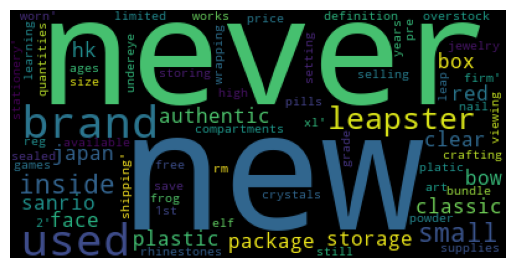

In [240]:
# Wordcould by using the column clean_description for first quantile
data=df.loc[df['price_qcut'] == 'first']
text = data['clean_description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

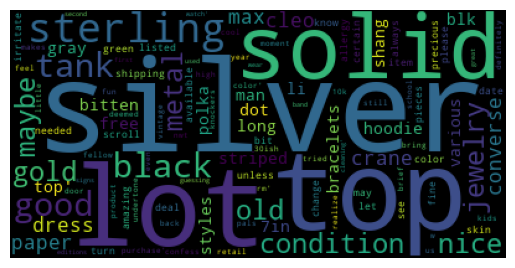

In [241]:
# Wordcould by using the column clean_description for second quantile
data=df.loc[df['price_qcut'] == 'second']
text = data['clean_description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

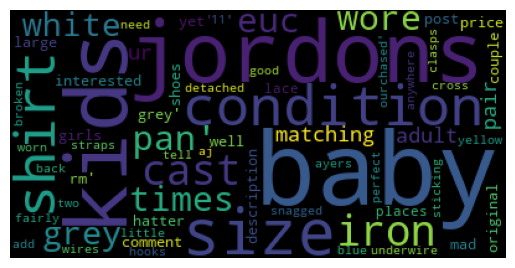

In [242]:
# Wordcould by using the column clean_description for third quantile
data=df.loc[df['price_qcut'] == 'third']
text = data['clean_description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

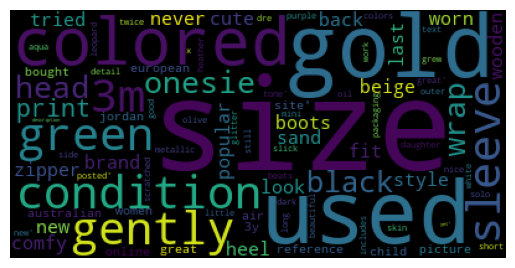

In [243]:
# Wordcould by using the column clean_description for fourth quantile
data=df.loc[df['price_qcut'] == 'fourth']
text = data['clean_description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<div  style="background-color: #F7EFF7 ; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
<p style="font-size: 16px;"><strong>Observations:</strong></p>    
    
1) for the overall wordcloud we found the top 5 words are: Top, Black, Small, Tank and condition
2) for the first quantile we found the top 5 words are : never, brand, new, authentic and leapster    
3) for the second quantile we found the top 5 words are : Silver, lot, top, solid and sterling   
4) for the third quantile we found the top 5 words are : Baby, kids, Jordons, shirt and size       
5) for the forth quantile we found the top 5 words are : Size, gold, Used, colored and gently        


 <p>
<span style="font-family: Arial; font-size:1.4em;color:blue;"> 
<span style="font-family: Arial; font-size:1.4em;color:blue;"> 
<center> <span style="font-family: Arial; font-size:2em;color:dodgerblue;">Time series analysis exercise SIG742: Part 2</p> </center>
 </p>

<hr style="border: 2px solid gray; width: 99.5%;">

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 2.1 - Gobinath
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs11'></a>

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the
NYC Taxi and Limousine Commission. The data included here consists of aggregating the total
number of taxi passengers into 30 minute buckets. In this question, we will simply process the
data and explore the time series.

• Create two new dataframes df_day and df_hour by aggregating the demand value on
daily and hourly level.

• Plot the demand value in two line charts for both df_day and df_hour dataframes.

• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day
dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary
enough (please explain your reasons in comments and report)?


<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 2.1

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> We will use pandas dataframe to read data from CSV file from the git hub
    <li> We will use python inbuild resample method is used to aggregate the data on a daily basis (D)/Hourly basis (H) and sum the demand values for each day/Hour </li> 
    <li>We will use Matplotlib to create a line plot for daily demand values. </li> 
    <li> We will use the seasonal_decompose function from statsmodels to decompose the daily demand into trend, seasonal, and residual components. </li> 
  <li> We will use the Augmented Dickey-Fuller (ADF) test to check for stationarity and obtain the p-value  </li>         
 </ol>
</div>

In [7]:
#Read the Data from Git
dfurl="https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/nyc_taxi.csv"
df = pd.read_csv(dfurl)

In [8]:
#Basic Data Validation
print("Any Duplicates are there ",df.duplicated().sum())
print("Shape of the Dataframe ",df.shape)

Any Duplicates are there  0
Shape of the Dataframe  (10320, 2)


In [9]:
df.head()

timestamp  value
0  2014-07-01 00:00:00  10844
1  2014-07-01 00:30:00   8127
2  2014-07-01 01:00:00   6210
3  2014-07-01 01:30:00   4656
4  2014-07-01 02:00:00   3820

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [11]:
print("Max timestamp",df['timestamp'].max())
print("Min Timestamp",df['timestamp'].min())

Max timestamp 2015-01-31 23:30:00
Min Timestamp 2014-07-01 00:00:00


The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the data and explore the time series.

• Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

• Plot the demand value in two line charts for both df_day and df_hour dataframes.

• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?

In [12]:
#2.1.1
#Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.
#Convert Object datatype to timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)
#Create new date dataframes
df_day = df['value'].resample('D').sum()
df_hour = df['value'].resample('H').sum()

In [13]:
df_day.head()

timestamp
2014-07-01    745967
2014-07-02    733640
2014-07-03    710142
2014-07-04    552565
2014-07-05    555470
Freq: D, Name: value, dtype: int64

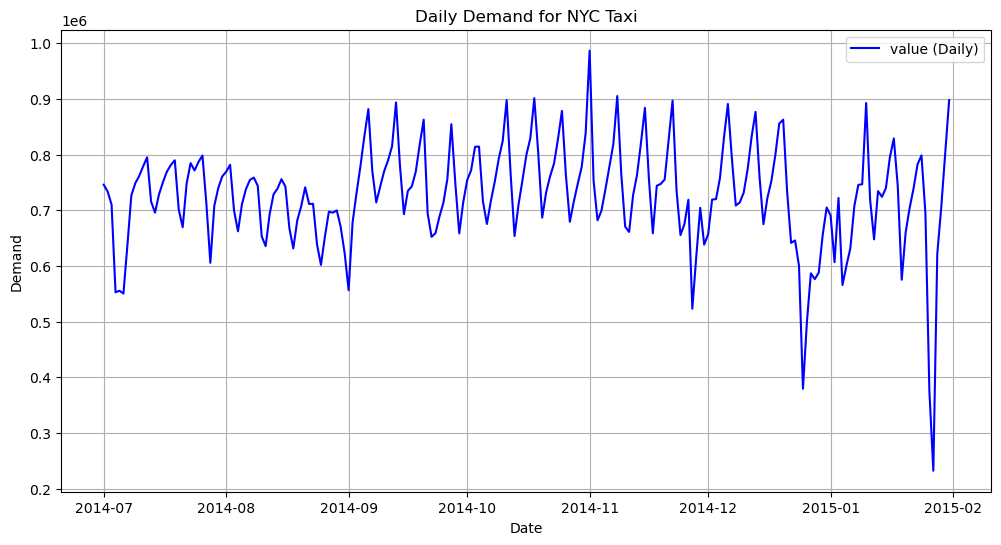

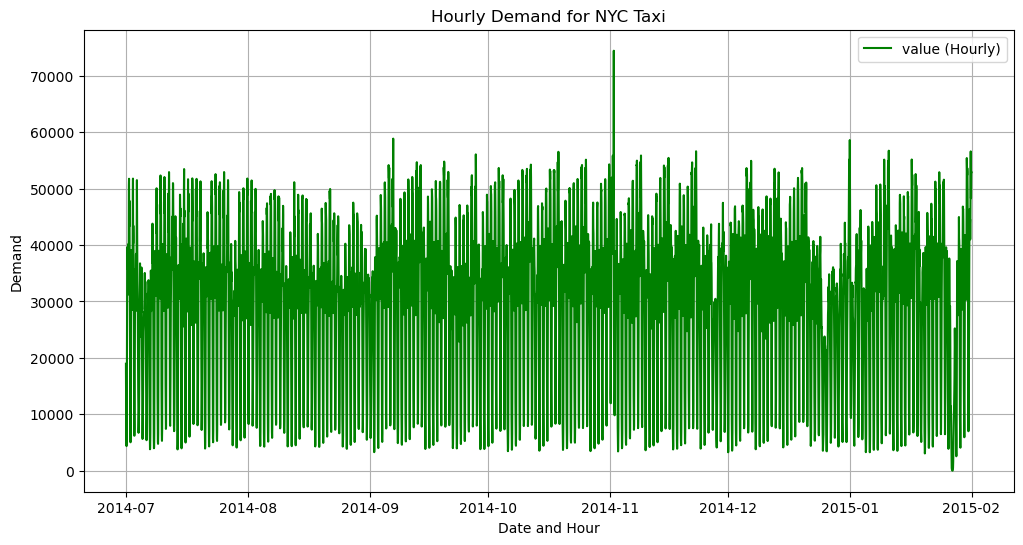

In [14]:
#2.1.2
#Plot the demand value in two line charts for both df_day and df_hour dataframes
# Plotting for df_day
plt.figure(figsize=(12, 6))
plt.plot(df_day.index, df_day.values, label='value (Daily)', color='blue')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Daily Demand for NYC Taxi')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for df_hour
plt.figure(figsize=(12, 6))
plt.plot(df_hour.index, df_hour.values, label='value (Hourly)', color='green')
plt.xlabel('Date and Hour')
plt.ylabel('Demand')
plt.title('Hourly Demand for NYC Taxi')
plt.legend()
plt.grid(True)
plt.show()

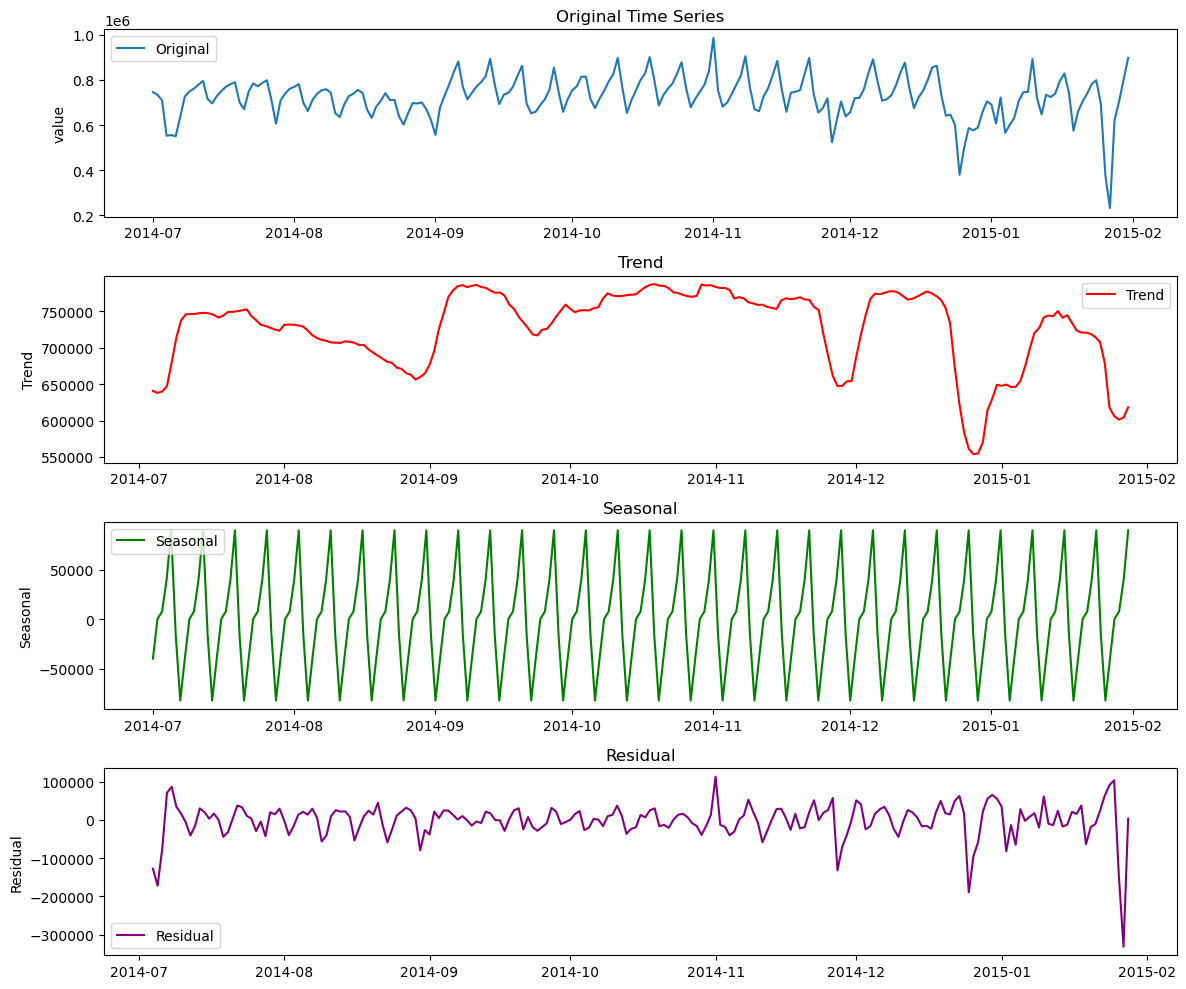

p-value from Augmented Dickey-Fuller test of df day: 0.009424599993717583
The series is likely stationary (p-value <= 0.05)


In [15]:
#2.1.3
#Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test.
#Do you think the df_day is stationary enough (please explain your reasons in comments and report
# Seasonal decomposition of df_day
#result = seasonal_decompose(df_day, model='additive', period=90)
result = seasonal_decompose(df_day, model='additive') 
# Plot the components
plt.figure(figsize=(12, 10))


plt.subplot(4, 1, 1)
plt.plot(df_day, label='Original')
plt.legend()
plt.ylabel('value')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='red')
plt.legend()
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend()
plt.ylabel('Seasonal')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='purple')
plt.legend()
plt.ylabel('Residual')
plt.title('Residual')

plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df_day.dropna(), autolag='AIC')

# Extract p-value
p_value = adf_result[1]

# Print the p-value
print("p-value from Augmented Dickey-Fuller test of df day:", p_value)

# Evaluate stationarity based on the p-value
# Null Hypothesis (H0): The series has a unit root (non-stationary)
# If p-value is less than a chosen significance level (e.g., 0.05), reject H0 and consider the series as stationary

# Provide an interpretation based on the p-value
if p_value <= 0.05:
    print("The series is likely stationary (p-value <= 0.05)")
else:
    print("The series is likely not stationary (p-value > 0.05)")


<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Explaination:</strong></p>
    <ul style="font-size: 15px;">
    <b> For Augmented Dickey Fuller (ADF) Test </b>
        
$H_0:$ Time series is non-stationary (i.e., standard deviation, mean and variance is not constant over time)

$H_A:$ Time series is stationary

From the test above for df_day, p-value = 0.009. This is less than .05, hence, we can reject the null hypothesis. We have to consider the time series as stationary.

   
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 2.2 - Nitin
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs12'></a>

In this question, we will try to use time series model such as ARIMA and others to build the
model(s) for forecasting the future.

• Create the acf and pacf plots for df_day dataframe.

• Find the best model with different parameters on ARIMA model. The parameter range for
p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean
Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.

• Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to
”Jan-31-2015”.

• Could you think of any other model (not as same as ARIMA) could do the forecasting for
demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model
(except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to
”Dec-01-2014” (same training data as the ARIMA).

Hint: there are some resources
regarding other time series forecasting models such as prophet here and also the
exponential smoothing here.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 2.2

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 2.2.1</p>
Create the acf and pacf plots for df_day dataframe.

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> to create ACF and PACF plots on df_day dataframe we will print them subsequentially </li> 
    <li> from the output question 2.1.3 it is observed that the results of the Augmented Dickey–Fuller test says that  the df_day dataset is stationary. therefore we can assume that the d value of or the I part of ARIMA should be zero
we will still create Autocorrelation (ACF) charts for using plot_acf() and plot_pacf function
 </li> 
 </ol>
   
</div>

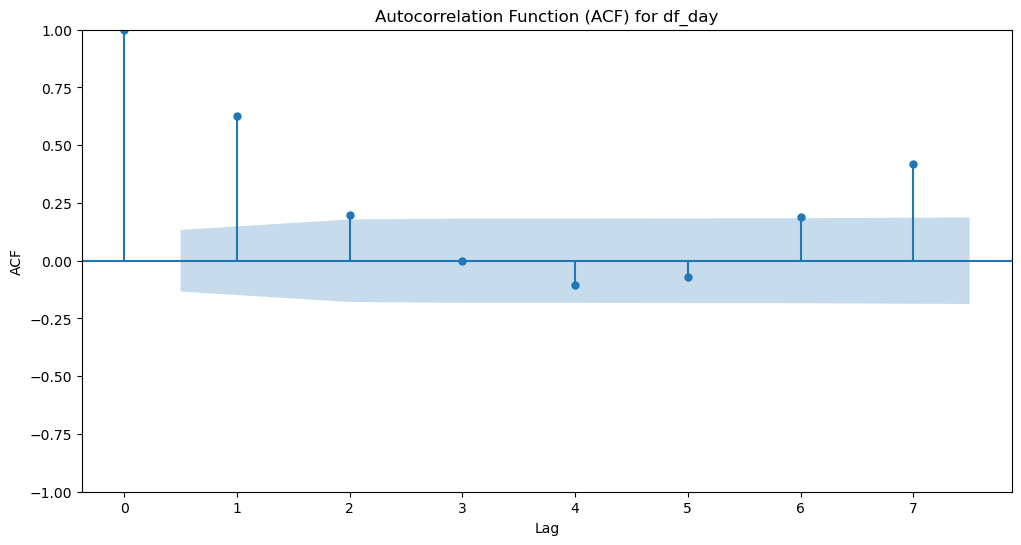

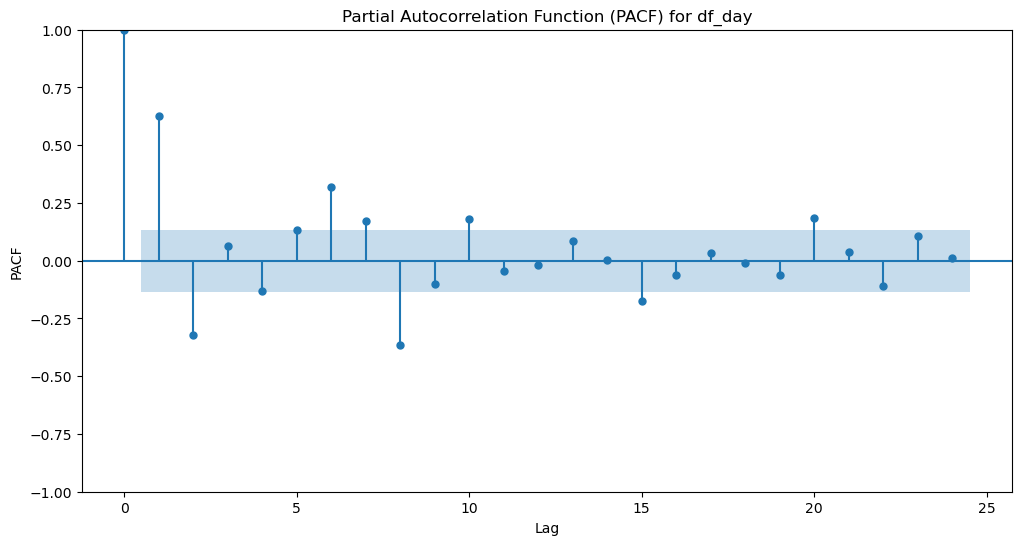

In [27]:
#2.2.1
#Create the acf and pacf plots for df_day dataframe.

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df_day, lags=7, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) for df_day')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_day, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) for df_day')
plt.show()

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>ACF & PACF </strong></p>
    <ul style="font-size: 15px;">
 <b>Autocorrelation Function (ACF) Plot: </b>

The ACF plot shows the correlation between the time series and its lagged values (previous time steps).
Each bar or point on the ACF plot represents the correlation between the time series at the current time step and the time series at a specific lag. as we can observe that the bar crosses the  horizontal lines (confidence intervals), it indicates that the correlation at that lag 7 is statistically significant.

        
<b>Partial Autocorrelation Function (PACF) Plot:</b>

The PACF plot shows the partial correlation between the time series and its lagged values while controlling for the influence of earlier lags. Like the ACF plot, each bar on the PACF plot reprsents the correlation at a specific lag. there are significant spikes in the PACF plot indicate that there is an autocorrelation structure available

</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 2.2.2</p>
Find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to "Dec-01-2014".

In [17]:
# Define the time range
start_date = '2014-07-01'
end_date = '2014-12-01'
# Extract the values from your DataFrame
subset_of_df_day= df_day[start_date:end_date]

In [18]:
# Convert a subset of the DataFrame 'subset_of_df_day' into a NumPy array 'X'
X = subset_of_df_day.values
# Calculate the split point as 70% of the total length of 'X'
split_point = int(0.7 * len(X))
# Split the data into a training set ('train') and a test set ('test') based on the calculated split point
train, test = X[:split_point], X[split_point:]

In [20]:
# Initialize lists
history = [x for x in train]  # Initialize 'history' list with training data
MAEs = []  # Initialize a list to store Mean Absolute Errors (MAEs)

# Define ranges for p, q, and d values
p_values = [0, 1, 2]
q_values = [0, 1, 2]
d_values = [0, 1, 2]

# Nested loops to iterate through different combinations of p, q, and d values
for p in p_values:
    for q in q_values:
        for d in d_values:
            predictions = []  # Initialize an empty list to store predictions for this combination of parameters
            for t in range(len(test)):  # Iterate through the test data

                # Create an ARIMA model with specified (p, d, q) order
                model = ARIMA(history, order=(p, d, q))
                model_fit = model.fit()  # Fit the ARIMA model to historical data
                output = model_fit.forecast()  # Make a one-step forecast
                yhat = output[0]  # Extract the forecasted value
                predictions.append(yhat)  # Append the forecast to predictions
                obs = test[t]  # Get the observed value from the test data
                history.append(obs)  # Update 'history' with the observed value

            # Calculate Mean Absolute Error (MAE) for this combination of parameters
            mae = mean_absolute_error(test, predictions)

            # Append the MAE to the 'MAEs' list and print the results
            MAEs.append(mae)
            print('Test MAE: {:.2f}, p={}, d={}, q={}'.format(mae, p, d, q))


Test MAE: 68926.49, p=0, d=0, q=0
Test MAE: 71963.36, p=0, d=1, q=0
Test MAE: 86500.38, p=0, d=2, q=0
Test MAE: 55467.25, p=0, d=0, q=1
Test MAE: 71290.84, p=0, d=1, q=1
Test MAE: 71602.91, p=0, d=2, q=1
Test MAE: 54812.75, p=0, d=0, q=2
Test MAE: 55325.02, p=0, d=1, q=2
Test MAE: 68200.80, p=0, d=2, q=2
Test MAE: 60514.57, p=1, d=0, q=0
Test MAE: 71752.73, p=1, d=1, q=0
Test MAE: 84022.40, p=1, d=2, q=0
Test MAE: 54751.75, p=1, d=0, q=1
Test MAE: 60555.36, p=1, d=1, q=1
Test MAE: 71018.37, p=1, d=2, q=1
Test MAE: 54672.07, p=1, d=0, q=2
Test MAE: 54765.92, p=1, d=1, q=2
Test MAE: 67205.13, p=1, d=2, q=2
Test MAE: 51780.96, p=2, d=0, q=0
Test MAE: 66500.59, p=2, d=1, q=0
Test MAE: 73910.77, p=2, d=2, q=0
Test MAE: 53310.64, p=2, d=0, q=1
Test MAE: 52033.85, p=2, d=1, q=1
Test MAE: 66021.35, p=2, d=2, q=1
Test MAE: 52373.28, p=2, d=0, q=2
Test MAE: 53326.37, p=2, d=1, q=2
Test MAE: 52445.60, p=2, d=2, q=2


### as we can see that the least value of MAE is 51780 with p=2, d=0, q=0, therefore we will utilize these number in our forcastig below

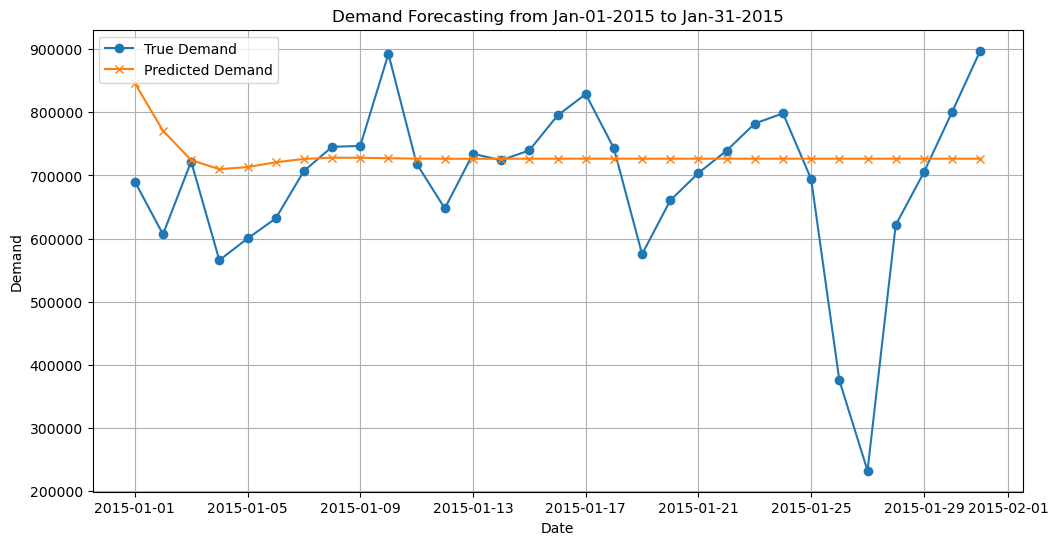

In [22]:
# Fit the best ARIMA model to the entire dataset (from start_date to end_date)
model = ARIMA(df_day, order=(2, 0, 0))  # Initialize an ARIMA model with specified order (p, d, q)
model_fit = model.fit()  # Fit the ARIMA model to the data

# Define the date range for forecasting
forecast_start_date = '2015-01-01'  # Start date for the forecast
forecast_end_date = '2015-01-31'  # End date for the forecast

# Generate forecasts for the specified date range
forecast = model_fit.forecast(steps=len(df_day[forecast_start_date:forecast_end_date]))  # Generate forecasts

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Plot the true demand data for the specified date range
plt.plot(df_day[forecast_start_date:forecast_end_date].index, df_day[forecast_start_date:forecast_end_date], label='True Demand', marker='o')

# Plot the predicted demand data for the same date range
plt.plot(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D'), forecast, label='Predicted Demand', marker='x')

# Set labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Forecasting from Jan-01-2015 to Jan-31-2015')

# Add a legend to the plot
plt.legend()

# Display grid lines on the plot
plt.grid(True)

# Show the plot
plt.show()


<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>ARIMA model Forecast</strong></p>
    <ul style="font-size: 15px;">
    <b>  </b>
To find the best model with different parameters on ARIMA model, We have performed several computations and calculations to address this.
i) we have utilized the df_day dataset for our forecasting
ii) Based on the date range specified, We have split our dataset into training and test dataset based on these dates and validated that our split dataset have data for the right date ranges.
iii) We have used the grid like option to iterarate over the data and observe the performace, we found that p, d, q values where we have found the least Test MAE was: 51780 against the values of 2,0,0.
iv) Basis on these value have done the forcasting on the Jan 2015 data where we have obseved that the forcasting is quite smoothen out.
</div>

<span style="font-family: Arial; font-size:1.5em;color:orange;"> Answer 2.2.3</p>
Could you think of any other model (not as same as ARIMA) could do the forecasting for demand value from "Jan-01-2015" to "Jan-31-2015"? You could choose one model (except ARIMA) and train the model based on the demand value from "Jul-01-2014" to "Dec-01-2014" (same training data as the ARIMA). Hint: there are some resources regarding other time series forecasting models such as prophet here and also the exponential smoothing here.



In [28]:
# Define the URL of the CSV file to be read
dfurl = "https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/nyc_taxi.csv"
# Read the CSV file into a DataFrame 'df_prophet' and parse the 'timestamp' column as dates
df_prophet = pd.read_csv(dfurl, parse_dates=['timestamp'])
# Create a new column 'date' in the DataFrame, containing only the date part of the 'timestamp' column
df_prophet['date'] = df_prophet['timestamp'].dt.date
# Create a new column 'hour' in the DataFrame, containing only the hour part of the 'timestamp' column
df_prophet['hour'] = df_prophet['timestamp'].dt.hour

In [29]:
# As per the opensource Prophet documentation, we need to rename the columns for the purpose of building the model

#Cloning of the data into dataframe which will be used for building the model
df_day_prophet = df_prophet.groupby('date')['value'].sum().reset_index()
df_hour_prophet = df_prophet.groupby(['date', 'hour'])['value'].sum().reset_index()

# renaming the columns to make them compatible for Prophet model
df_day_prophet.rename(columns={'date': 'ds', 'value': 'y'}, inplace=True)
df_hour_prophet.rename(columns={'date': 'ds', 'hour': 'h', 'value': 'y'}, inplace=True)

In [30]:
df_day_prophet.head()

ds       y
0  2014-07-01  745967
1  2014-07-02  733640
2  2014-07-03  710142
3  2014-07-04  552565
4  2014-07-05  555470

In [31]:
df_hour_prophet.head()

ds  h      y
0  2014-07-01  0  18971
1  2014-07-01  1  10866
2  2014-07-01  2   6693
3  2014-07-01  3   4433
4  2014-07-01  4   4379

In [32]:
#pip install prophet

In [33]:
# Create and fit the Prophet model for daily data
model_day_seasonality = Prophet(daily_seasonality=True)
model_day_seasonality.fit(df_day_prophet)

11:44:24 - cmdstanpy - INFO - Chain [1] start processing
11:44:24 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Create a new Prophet model instance called 'model_hour'
model_hour = Prophet()
# Fit the Prophet model to the 'df_hour_prophet' DataFrame
model_hour.fit(df_hour_prophet)

11:44:24 - cmdstanpy - INFO - Chain [1] start processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create a DataFrame 'df_forecast_dates' containing the dates to be forecasted
# The date range is from '2015-01-01' to '2015-01-31' with a daily frequency ('D')
df_forecast_dates = pd.date_range(start='2015-01-01', end='2015-01-31', freq='D')

# Create a new DataFrame 'df_forecast_dates' with a single column named 'ds' to store the forecast dates
df_forecast_dates = pd.DataFrame({'ds': df_forecast_dates})

In [36]:
# Generate forecasts using the daily model (model_day_seasonality) for the specified forecast dates
prophet_forecast_day = model_day_seasonality.predict(df_forecast_dates)

# Generate forecasts using the hourly model (model_hour) for the specified forecast dates
prophet_forecast_hour = model_hour.predict(df_forecast_dates)

In [37]:
# printing the first 5 rows
prophet_forecast_day.head()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2015-01-01  732903.566926  620933.639776  793627.309947  732903.566926   
1 2015-01-02  731951.507151  648257.208430  839350.271373  731951.507151   
2 2015-01-03  730999.447375  703775.961588  884117.761277  730999.447375   
3 2015-01-04  730047.387600  592926.074620  768722.645960  730047.387600   
4 2015-01-05  729095.327825  516324.304359  698480.271246  729095.327825   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  732903.566926   -21162.860302         -21162.860302         -21162.860302   
1  731951.507151     9717.243464           9717.243464           9717.243464   
2  730999.447375    58979.382115          58979.382115          58979.382115   
3  730047.387600   -50996.611262         -50996.611262         -50996.611262   
4  729095.327825  -117414.855009        -117414.855009        -117414.855009   

          daily   daily_lower   daily_upper        weekly  weekly_lower  \
0 -31885.956685 -31885.956685 -31885.956685  10723.096383  10723.096383   
1 -31885.956685 -31885.956685 -31885.956685  41603.200150  41603.200150   
2 -31885.956685 -31885.956685 -31885.956685  90865.338801  90865.338801   
3 -31885.956685 -31885.956685 -31885.956685 -19110.654577 -19110.654577   
4 -31885.956685 -31885.956685 -31885.956685 -85528.898323 -85528.898323   

   weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  10723.096383                   0.0                         0.0   
1  41603.200150                   0.0                         0.0   
2  90865.338801                   0.0                         0.0   
3 -19110.654577                   0.0                         0.0   
4 -85528.898323                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  711740.706624  
1                         0.0  741668.750615  
2                         0.0  789978.829491  
3                         0.0  679050.776338  
4                         0.0  611680.472816

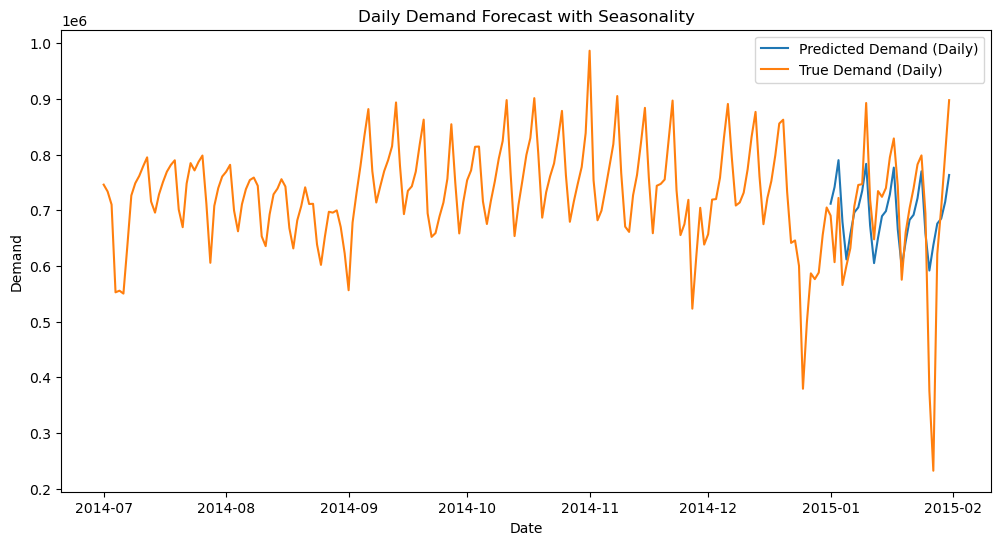

In [172]:
# Create a new figure for plotting
plt.figure(figsize=(12, 6))
# Plot the predicted daily demand values ('yhat') using the 'prophet_forecast_day' DataFrame
plt.plot(df_forecast_dates, prophet_forecast_day['yhat'], label='Predicted Demand (Daily)')
# Plot the true daily demand values ('y') from the 'df_day_prophet' DataFrame
plt.plot(df_day_prophet['ds'], df_day_prophet['y'], label='True Demand (Daily)')
# Set the x-axis label
plt.xlabel('Date')
# Set the y-axis label
plt.ylabel('Demand')
# Set the plot title
plt.title('Daily Demand Forecast with Seasonality')
# Add a legend to distinguish between the predicted and true demand
plt.legend()

# Display the plot
plt.show()


<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Observation</strong></p>
    <ul style="font-size: 15px;">
    <b>  </b>
as we can see that the performance of the prophat is quite well in comprasion to ARIMA, it has well forcasted the values for the month of jan 2015.
</div>

<span style="font-family: Arial; font-size:2em;color:gold;"> Question 2.3 - Rohan
[<span style="float: right;font-weight:bold;font-size:.55em;color:#000080;">Back to Top](#q10)    
<a id='qs13'></a>

In this question, we will detect the anomaly within the df_day dataframe.

• Create the Weekday column according to the timestamp column in df_day dataframe. The
value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,
’Thursday’,’Friday’, ’Saturday’, ’Sunday’]. Also create the Hour, Day, Month, Year,
Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and
Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns
in df_day dataframe according to the timestamp column.

• Using Isolation Forest with above crafted features in df_day to find out the date which is
identified as ’outlier’.

<span style="font-family: Arial; font-size:2em;color:blue;"> Answer 2.3

<div  style="background-color: #F2F3F4; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Approach:</strong></p>
    <ol style="font-size: 16px;">
    <li> In the question we need to create weekday columns accroding to the timestamp columns of df_day  </li> 
    <li> We will have to add 7 additional columns namely hour ,day, month, year, month_day, lag and rolling mean </li> 
    <li> oFr the weekday mapping we will use the lambda function to extract the day and pass it onto the weekday mapping which converted to either Monday, Tuesday or other days. Extraction of our day, month, year, month_day was straightforward from the time stamp column. </li> 
    <li> To create the lag column, We use the shift functionality and shifted by one. We will use option fill value equal to 0 since for the first data they would not be any lag item and rather than having NaN, we will use and fill with zero using this option. </li> 
<li>To create the rolling main column we use the rolling function in conjunction with mean function. As defined in the question, we will use the isolation forest from sklean.ensemble package, and passed on the seven columns created before. Namely hour, day, month, year, month_day, leg, rolling_mean. After fitting the data,</li>    
<li> we will creat two columns namely scores and anomaly score. Score where the model's decision_function will be used for scores and predict function will be used for anomalies score. To find the top anomalies, we will use the condition of anomaly score equal to -1 and sorted the value by scores column</li>        
 </ol>
   
</div>

In [173]:
df_day

timestamp
2014-07-01    745967
2014-07-02    733640
2014-07-03    710142
2014-07-04    552565
2014-07-05    555470
               ...  
2015-01-27    232058
2015-01-28    621483
2015-01-29    704935
2015-01-30    800478
2015-01-31    897719
Freq: D, Name: value, Length: 215, dtype: int64

In [174]:
df_day=df_day.reset_index()

In [175]:
# Mapping of the week day
weekDaysMapping = ("Monday", "Tuesday",
                   "Wednesday", "Thursday",
                   "Friday", "Saturday",
                   "Sunday")
df_day['Weekday'] = df_day['timestamp'].apply(lambda x: weekDaysMapping[x.weekday()])
df_day['Hour'] = df_day['timestamp'].dt.hour
df_day['Day'] = df_day['timestamp'].dt.weekday
df_day['Month'] = df_day['timestamp'].dt.month
df_day['Year'] = df_day['timestamp'].dt.year
df_day['Month_day'] = df_day['timestamp'].dt.day
df_day['Lag'] = df_day['value'].shift(1,fill_value=0)
df_day['Rolling_Mean'] = df_day["value"].rolling(7, min_periods=1).mean()
df_day

timestamp   value    Weekday  Hour  Day  Month  Year  Month_day     Lag  \
0   2014-07-01  745967    Tuesday     0    1      7  2014          1       0   
1   2014-07-02  733640  Wednesday     0    2      7  2014          2  745967   
2   2014-07-03  710142   Thursday     0    3      7  2014          3  733640   
3   2014-07-04  552565     Friday     0    4      7  2014          4  710142   
4   2014-07-05  555470   Saturday     0    5      7  2014          5  552565   
..         ...     ...        ...   ...  ...    ...   ...        ...     ...   
210 2015-01-27  232058    Tuesday     0    1      1  2015         27  375311   
211 2015-01-28  621483  Wednesday     0    2      1  2015         28  232058   
212 2015-01-29  704935   Thursday     0    3      1  2015         29  621483   
213 2015-01-30  800478     Friday     0    4      1  2015         30  704935   
214 2015-01-31  897719   Saturday     0    5      1  2015         31  800478   

      Rolling_Mean  
0    745967.000000  
1    739803.500000  
2    729916.333333  
3    685578.500000  
4    659556.800000  
..             ...  
210  617971.285714  
211  606190.857143  
212  601270.714286  
213  603860.714286  
214  618035.142857  

[215 rows x 10 columns]

In [176]:
# Using IsolationForest model and passing the seven crafted features

model=IsolationForest(n_estimators=10,max_samples='auto',contamination=float(0.2),random_state=1)

model.fit(df_day[['Hour', 'Day', 'Month', 'Year', 'Month_day', 'Lag', 'Rolling_Mean']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 10, 'n_jobs': None, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [177]:
# Adding scores and anomaly score to the df_day dataframe and printing the anomalies
df_day['scores'] = model.decision_function(df_day[['Hour', 'Day', 'Month', 'Year', 'Month_day', 'Lag', 'Rolling_Mean']])

df_day['anomaly_score'] = model.predict(df_day[['Hour', 'Day', 'Month', 'Year', 'Month_day', 'Lag', 'Rolling_Mean']])

# Following are the anomalies
df_day[df_day['anomaly_score']==-1].sort_values(by='scores')



timestamp   value    Weekday  Hour  Day  Month  Year  Month_day     Lag  \
211 2015-01-28  621483  Wednesday     0    2      1  2015         28  232058   
183 2014-12-31  704941  Wednesday     0    2     12  2014         31  655665   
210 2015-01-27  232058    Tuesday     0    1      1  2015         27  375311   
214 2015-01-31  897719   Saturday     0    5      1  2015         31  800478   
181 2014-12-29  588023     Monday     0    0     12  2014         29  576228   
209 2015-01-26  375311     Monday     0    0      1  2015         26  694262   
188 2015-01-05  600132     Monday     0    0      1  2015          5  565709   
194 2015-01-11  718725     Sunday     0    6      1  2015         11  892664   
202 2015-01-19  575177     Monday     0    0      1  2015         19  743123   
212 2015-01-29  704935   Thursday     0    3      1  2015         29  621483   
5   2014-07-06  550285     Sunday     0    6      7  2014          6  555470   
189 2015-01-06  631877    Tuesday     0    1      1  2015          6  600132   
182 2014-12-30  655665    Tuesday     0    1     12  2014         30  588023   
178 2014-12-26  499102     Friday     0    4     12  2014         26  379302   
180 2014-12-28  576228     Sunday     0    6     12  2014         28  586604   
190 2015-01-07  707015  Wednesday     0    2      1  2015          7  631877   
195 2015-01-12  647742     Monday     0    0      1  2015         12  718725   
213 2015-01-30  800478     Friday     0    4      1  2015         30  704935   
201 2015-01-18  743123     Sunday     0    6      1  2015         18  828957   
208 2015-01-25  694262     Sunday     0    6      1  2015         25  798498   
4   2014-07-05  555470   Saturday     0    5      7  2014          5  552565   
207 2015-01-24  798498   Saturday     0    5      1  2015         24  782348   
184 2015-01-01  690407   Thursday     0    3      1  2015          1  704941   
6   2014-07-07  636570     Monday     0    0      7  2014          7  550285   
0   2014-07-01  745967    Tuesday     0    1      7  2014          1       0   
124 2014-11-02  753705     Sunday     0    6     11  2014          2  986568   
187 2015-01-04  565709     Sunday     0    6      1  2015          4  722115   
179 2014-12-27  586604   Saturday     0    5     12  2014         27  499102   
200 2015-01-17  828957   Saturday     0    5      1  2015         17  795094   
186 2015-01-03  722115   Saturday     0    5      1  2015          3  606716   
203 2015-01-20  660452    Tuesday     0    1      1  2015         20  575177   
196 2015-01-13  734397    Tuesday     0    1      1  2015         13  647742   
197 2015-01-14  724099  Wednesday     0    2      1  2015         14  734397   
193 2015-01-10  892664   Saturday     0    5      1  2015         10  746839   
204 2015-01-21  703946  Wednesday     0    2      1  2015         21  660452   
191 2015-01-08  745416   Thursday     0    3      1  2015          8  707015   
192 2015-01-09  746839     Friday     0    4      1  2015          9  745416   
185 2015-01-02  606716     Friday     0    4      1  2015          2  690407   
198 2015-01-15  739819   Thursday     0    3      1  2015         15  724099   
61  2014-08-31  622555     Sunday     0    6      8  2014         31  669853   
199 2015-01-16  795094     Friday     0    4      1  2015         16  739819   
205 2015-01-22  739376   Thursday     0    3      1  2015         22  703946   
160 2014-12-08  708467     Monday     0    0     12  2014          8  794150   

      Rolling_Mean    scores  anomaly_score  
211  606190.857143 -0.167664             -1  
183  569980.714286 -0.143246             -1  
210  617971.285714 -0.129001             -1  
214  618035.142857 -0.105914             -1  
181  553577.857143 -0.104973             -1  
209  679170.428571 -0.101392             -1  
188  649383.571429 -0.096903             -1  
194  720381.142857 -0.081180             -1  
202  734380.857143 -0.076006             -1  
212  601270.714286 -0.07

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Observation</strong></p>
    <ul style="font-size: 15px;">
    <b>  </b>
The first data point gave us the top anomaly which came out to be 28th January 2015 as the outlier. Other outliers were also identified and printed as a result above.
</div>

<div  style="background-color: pink; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>References</strong></p>
    <ul style="font-size: 15px;">

</div>

rahulhegde97(n.a.) *Time Series Analysis using Facebook Prophet*, accessed on 05th Oct 2023,https://www.geeksforgeeks.org/time-series-analysis-using-facebook-prophet/

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong>Learning from Team Members</strong></p>
    <ul style="font-size: 15px;">
    <b>  </b>
Each member of the team is very supportive, flexiable and deep minded. Each member brings a unique set of skills and experiences to the table, enriching our collective ability to tackle complex challenges.
        
One of the defining characteristics of our team is our commitment to adaptability. As working professionals, we understand the demands and constraints of our individual schedules. This recognition has led us to embrace flexibility as a core principle in our project collaboration. We recognize that sometimes, the best ideas and solutions arise when we can accommodate the diverse working hours and commitments of our team members.

To ensure effective communication and decision-making, we have made it a priority to find common ground when scheduling discussions and meetings. This approach allows us to maximize our collaborative potential, ensuring that every member has an opportunity to contribute and be heard. By coming together at a time that suits all of us, we are able to harness the full range of perspectives and insights within our team.
        
we have used multiple colobration tools like Ms teams, whatsapp and google co-lab etc. for the efficently working.        
        
In this project, we not only strengthen our project's outcomes but also foster a sense of unityamong our team members. Our commitment to collaboration, adaptability in driving our project forward and achieving our shared goals. With each member's dedication and open-mindedness, we are well on our way to success.        

</div>

<div  style="background-color: #EBF5FB; padding: 5px; border-radius: 5px;font-family:Cambria;border: 1px solid black; border-radius: 5px">
    <p style="font-size: 16px;"><strong> Contribution of each team member for finishing the second assignment</strong></p>
    <ul style="font-size: 15px;">
    <b>  </b>
Our collaboration on this project was structured and well-coordinated, allowing us to efficiently divide and conquer the tasks at hand. In the first part of the project, we divided the questions among ourselves to ensure that each team member had a manageable workload.

Gobinath took the lead on questions 1.1 to 1.4. Myself, I handled questions 1.5 to 1.7. Rohan did  questions 1.8 to 1.10, 
        
In the second part of the project, we again assigned specific tasks to each team member to optimize our efficiency. Gobinath was responsible for question 2.1. I took on question 2.2 Rohan contributed by addressing question 2.4

To streamline our collaboration and save time, we decided to record our individual contributions separately. By doing so, we ensured that each team member could focus on their specific tasks without interruptions or scheduling conflicts. Once our recordings were complete, we combined them into a single video. This approach not only saved time but also allowed us to maintain the quality and coherence of our presentation.

Additionally, we converted the Python file into a more accessible format by using HTML to PDF conversion. This step made our work more user-friendly and accessible to a wider audience.
        
</div>